In [ ]:
import librosa
import os

In [ ]:
base_dir='./drive/MyDrive/ML_prj_2023/'
dir_list=[]
for i in range(7):
  for j in range(6):
    dir_list.append(base_dir+f'D_{i}/I_{j}/')
print(dir_list)

['./drive/MyDrive/ML_prj_2023/D_0/I_0/', './drive/MyDrive/ML_prj_2023/D_0/I_1/', './drive/MyDrive/ML_prj_2023/D_0/I_2/', './drive/MyDrive/ML_prj_2023/D_0/I_3/', './drive/MyDrive/ML_prj_2023/D_0/I_4/', './drive/MyDrive/ML_prj_2023/D_0/I_5/', './drive/MyDrive/ML_prj_2023/D_1/I_0/', './drive/MyDrive/ML_prj_2023/D_1/I_1/', './drive/MyDrive/ML_prj_2023/D_1/I_2/', './drive/MyDrive/ML_prj_2023/D_1/I_3/', './drive/MyDrive/ML_prj_2023/D_1/I_4/', './drive/MyDrive/ML_prj_2023/D_1/I_5/', './drive/MyDrive/ML_prj_2023/D_2/I_0/', './drive/MyDrive/ML_prj_2023/D_2/I_1/', './drive/MyDrive/ML_prj_2023/D_2/I_2/', './drive/MyDrive/ML_prj_2023/D_2/I_3/', './drive/MyDrive/ML_prj_2023/D_2/I_4/', './drive/MyDrive/ML_prj_2023/D_2/I_5/', './drive/MyDrive/ML_prj_2023/D_3/I_0/', './drive/MyDrive/ML_prj_2023/D_3/I_1/', './drive/MyDrive/ML_prj_2023/D_3/I_2/', './drive/MyDrive/ML_prj_2023/D_3/I_3/', './drive/MyDrive/ML_prj_2023/D_3/I_4/', './drive/MyDrive/ML_prj_2023/D_3/I_5/', './drive/MyDrive/ML_prj_2023/D_4/I_0/',

In [ ]:
adr=[]
for addr in dir_list:
  [adr.append(addr+i) for i in os.listdir(addr) if len(i.split('.mp3'))>1]
print(len(adr))

694


In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from time import time
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import random
random.seed(0)
import librosa
import warnings
warnings.filterwarnings("ignore")

In [ ]:
def get_features(y, sr=44100):
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr) #Chroma Spectogram
    chroma_cqt = librosa.feature.chroma_cqt(y=y, sr=sr)
    chroma_cens = librosa.feature.chroma_cens(y=y, sr=sr)
    # chroma_vqt = librosa.feature.chroma_vqt(y=y, sr=sr)
    melspectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
    mfcc = librosa.feature.mfcc(y=y, sr=sr) # mfc coefficients
    rmse = librosa.feature.rms(y=y) #root mean square
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)#spectral centroid
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr) #spectral bandwidth
    spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
    spectral_flatness= librosa.feature.spectral_flatness(y=y)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr) #spectral roll off
    poly_features = librosa.feature.poly_features(y=y, sr=sr)
    tonnetz = librosa.feature.tonnetz(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y) #zero crossing rate
    return [chroma_stft,chroma_cqt,chroma_cens,melspectrogram,mfcc,rmse,spec_cent,spec_bw,spectral_contrast,
            spectral_flatness,rolloff,poly_features,tonnetz,zcr]

In [ ]:
feature_vectors = []
# sound_paths = []
i=0
label1=[]
label2=[]
for f in adr:
        try:
          L = librosa.get_duration(filename=f) -20 #fist we calculate the duration of the input sound
          y, sr = librosa.load(f, sr=44100, duration=20, offset=random.randrange(int(L))) #then we sample 20 second from a random point in file
          y/=y.max() #then we normalize the input so all sounds have same volume
          k = get_features(y) #then we extract the features
          #then add the whole features into a string file so we can add them all together into feature vector
          to_append = f''
          for kk in k:
            for e in kk:
              # print(len(kk))
              to_append += f' {np.mean(e)}'
          feature_vectors.append(to_append.split())
          print(len(to_append.split()))
          print(i/len(adr))
          i+=1
          label1.append(int(f.split('/')[-2].split('_')[1]))
          label2.append(int(f.split('/')[-3].split('_')[1]))
          # print(len(label))
          # print("len(label)")
          #and add sound file path to sound_path 
          # sound_paths.append(f)
        except:
          pass
#finally turning feature_vector into numpy array
feature_vectors = np.array(feature_vectors)
print("Calculated %d feature vectors"%len(feature_vectors))

205
0.0
205
0.001440922190201729
205
0.002881844380403458
205
0.004322766570605188
205
0.005763688760806916
205
0.007204610951008645
205
0.008645533141210375
205
0.010086455331412104
205
0.011527377521613832
205
0.012968299711815562
205
0.01440922190201729
205
0.01585014409221902
205
0.01729106628242075
205
0.018731988472622477
205
0.020172910662824207
205
0.021613832853025938
205
0.023054755043227664
205
0.024495677233429394
205
0.025936599423631124
205
0.027377521613832854
205
0.02881844380403458
205
0.03025936599423631
205
0.03170028818443804
205
0.03314121037463977
205
0.0345821325648415
205
0.03602305475504323
205
0.037463976945244955
205
0.03890489913544669
205
0.040345821325648415
205
0.04178674351585014
205
0.043227665706051875
205
0.0446685878962536
205
0.04610951008645533
205
0.04755043227665706
205
0.04899135446685879
205
0.05043227665706052
205
0.05187319884726225
205
0.053314121037463975
205
0.05475504322766571
205
0.056195965417867436
205
0.05763688760806916
205
0.0590778

In [ ]:
labelencoder = LabelEncoder()
labelencoder.fit(label1)
classes_num = labelencoder.transform(label1)

In [ ]:
with open('X.pickle', 'wb') as f: #saves file to hard disk
    pickle.dump(feature_vectors, f)
    
with open('label1.pickle', 'wb') as f: #saves file to hard disk
    pickle.dump(label1, f)  
    
with open('label2.pickle', 'wb') as f: #saves file to hard disk
    pickle.dump(label2, f)

In [ ]:
os.getcwd()

'/content'

In [ ]:
with open('X.pickle', 'rb') as f: #loads the file from hard disk
    X = pickle.load(f)
    
with open('labels.pickle', 'rb') as f: #loads the file from hard disk
    labels = pickle.load(f)

In [ ]:
# encoding labels using LabelEncoder in sklearn
labelencoder = LabelEncoder()
labelencoder.fit(label1)
y = labelencoder.transform(label1)

In [ ]:
def plot_confusion_matrix(cm, classes, title, cmap='Blues'):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
accuracy = []
f1_score = []
precision = []
recall = []
accuracy_cv = []
confusion_mtrx = []

In [ ]:
print(len(label))

89


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(feature_vectors, label1, test_size=0.3, random_state=0, stratify=label1)

In [ ]:
scaler = preprocessing.StandardScaler()
X_sclr = scaler.fit_transform(feature_vectors)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

The best accuracy is 56.73 % with k = 10


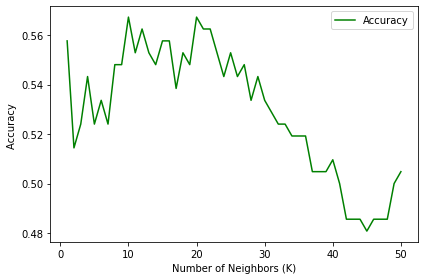

In [ ]:
K = 50
acc = []
for n in range(1,K+1):
    clf = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    yhat = clf.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))

acc = np.array(acc)
print( "The best accuracy is", round(acc.max()*100, 2), "% with k =", acc.argmax()+1) 
plt.plot(range(1,K+1),acc,'g',label='Accuracy')
plt.legend()
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()